In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,10
import seaborn as sb

In [2]:
train = pd.read_csv('C:/Hari Docs/Dataset/houseprices_train.csv')
test = pd.read_csv('C:/Hari Docs/Dataset/houseprices_test.csv')
print(train.shape, test.shape)

(1460, 81) (1459, 80)


In [3]:
#Adding source
train['source'] = 'train'
test['source'] = 'test'
print(train.shape, test.shape)

(1460, 82) (1459, 81)


In [4]:
df = pd.concat([train, test])
df.shape

(2919, 82)

In [5]:
#percentage of missing values
null_df = df.columns[df.isnull().any()]
num = df[null_df].isnull().sum()
round(num/2919, 2) 

Alley           0.93
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinSF1      0.00
BsmtFinSF2      0.00
BsmtFinType1    0.03
BsmtFinType2    0.03
BsmtFullBath    0.00
BsmtHalfBath    0.00
BsmtQual        0.03
BsmtUnfSF       0.00
Electrical      0.00
Exterior1st     0.00
Exterior2nd     0.00
Fence           0.80
FireplaceQu     0.49
Functional      0.00
GarageArea      0.00
GarageCars      0.00
GarageCond      0.05
GarageFinish    0.05
GarageQual      0.05
GarageType      0.05
GarageYrBlt     0.05
KitchenQual     0.00
LotFrontage     0.17
MSZoning        0.00
MasVnrArea      0.01
MasVnrType      0.01
MiscFeature     0.96
PoolQC          1.00
SalePrice       0.50
SaleType        0.00
TotalBsmtSF     0.00
Utilities       0.00
dtype: float64

In [6]:
#percentage of zero values for each numeric variable
zero_df = df.columns[(df == 0).any()]
num = (df[zero_df] == 0).sum()
round(num/2919, 2) 

2ndFlrSF         0.57
3SsnPorch        0.99
BedroomAbvGr     0.00
BsmtFinSF1       0.32
BsmtFinSF2       0.88
BsmtFullBath     0.58
BsmtHalfBath     0.94
BsmtUnfSF        0.08
EnclosedPorch    0.84
Fireplaces       0.49
FullBath         0.00
GarageArea       0.05
GarageCars       0.05
HalfBath         0.63
KitchenAbvGr     0.00
LowQualFinSF     0.99
MasVnrArea       0.60
MiscVal          0.96
OpenPorchSF      0.44
PoolArea         1.00
ScreenPorch      0.91
TotalBsmtSF      0.03
WoodDeckSF       0.52
dtype: float64

In [7]:
# Drop columns with more than 90% of values with either zero or missing
#Zeros - 3SsnPorch, BsmtHalfBath, LowQualFinSF, MiscVal, PoolArea, ScreenPorch
#NaN's - Alley, MiscFeature, PoolQC
drop_col = ['3SsnPorch', 'Alley','BsmtHalfBath', 'LowQualFinSF', 'MiscFeature', 'MiscVal','PoolArea', 'PoolQC', 'ScreenPorch']
df.drop(drop_col, axis=1, inplace=True)
df.shape

(2919, 73)

In [8]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BldgType', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir',
       'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond',
       'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu',
       'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SalePrice',
       'SaleType', 'Street', 'TotRmsAbvGrd', 'T

In [10]:
df[['YearBuilt','YearRemodAdd','YrSold']].head()

,YearBuilt,YearRemodAdd,YrSold
0,2003,2003,2008
1,1976,1976,2007
2,2001,2002,2008
3,1915,1970,2006
4,2000,2000,2008


In [11]:
df['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

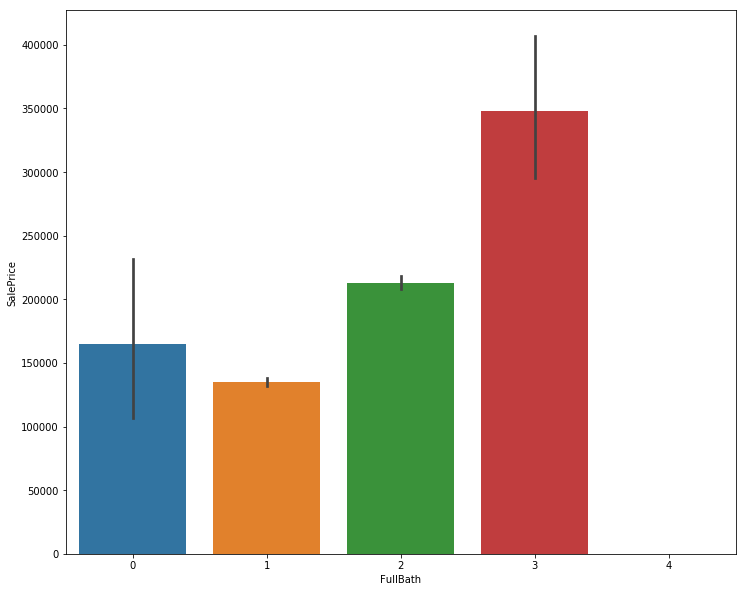

In [63]:
sb.barplot(x='FullBath', y='SalePrice', data=df)

In [24]:
# BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual - These features seem to have equal missing values
# Field descriptions for the above variables says 'NA' means 'No Basement'.
#First we will change NA for the above fields to something Python can read instead of considering them as missing values

col = ['BsmtCond','BsmtExposure','BsmtFinType1, BsmtFinType2, BsmtQual']
for i in col:
    Nan_rows = df[i].isnull()
    df.loc[Nan_rows, i] = 'None'
    print ('Null values of {} is: {:d}' .format(i, df[i].isnull().sum()))



Null values of BsmtFinType1 is: 0
Null values of BsmtFinType2 is: 0
Null values of BsmtQual is: 0


In [50]:
#From the above we can see that there 81 values missing for BsmtFinSF1 and BsmtFinSF2
zero_df = (df['BsmtFinSF1'] == 0)
df.loc[zero_df, ].groupby('BsmtFinType1').BsmtFinSF1.count()


BsmtFinType1
None     78
Unf     851
Name: BsmtFinSF1, dtype: int64

In [51]:
zero_df = (df['BsmtFinSF2'] == 0)
df.loc[zero_df, ].groupby('BsmtFinType2').BsmtFinSF1.count()


BsmtFinType2
BLQ        1
None      78
Unf     2492
Name: BsmtFinSF1, dtype: int64

In [58]:
## BsmtFinSF1 and BsmtFinSF2 can have zero values where BsmtFinType1 or BsmntFinType2 are NA or Unf (unfinished)
# I would assume that to be treated as no basement
# Hence changing unf values to None for bsmtFinType1 and BsmntFinType2
Unf_rows = (df['BsmtFinType1'] == 'Unf')
df.loc[Unf_rows,'BsmtFinType1'] = 'None'
print('Valuecount of BsmtFinType1: ', df['BsmtFinType1'].value_counts())

Unf_rows = (df['BsmtFinType2'] == 'Unf')
df.loc[Unf_rows,'BsmtFinType2'] = 'None'
print('Valuecount of BsmtFinType2: ', df['BsmtFinType2'].value_counts())

Valuecount of BsmtFinType1:  None    930
GLQ     849
ALQ     429
Rec     288
BLQ     269
LwQ     154
Name: BsmtFinType1, dtype: int64
Valuecount of BsmtFinType2:  None    2573
Rec      105
LwQ       87
BLQ       68
ALQ       52
GLQ       34
Name: BsmtFinType2, dtype: int64


In [68]:
#We can combine BsmtFullBath and FullBath to see total bathrooms for the house
# Similarly combine BsmtHalfBath and HalfBath
df['TotalFullBath'] = df['BsmtFullBath'] + df['FullBath']
print('Null values in TotalFullBath: ', df['TotalFullBath'].isnull().sum())

Null values in TotalFullBath:  2


In [69]:
df['TotalFullBath'].value_counts()

2.0    1466
1.0     757
3.0     644
4.0      44
6.0       5
0.0       1
Name: TotalFullBath, dtype: int64

In [76]:
#We see that there are 2 missing values and one value which is zero. We will impute this with mode
#df['TotalFullBath'].fillna(df['TotalFullBath'].mode()[0], inplace= True)
null_rows = ((df['TotalFullBath'] == 0) | (df['TotalFullBath'].isnull()))
print('Null values in TotalFullBath Before: ', df['TotalFullBath'].isnull().sum())
df.loc[null_rows,'TotalFullBath'] =  df['TotalFullBath'].mode()[0]
print('Null values in TotalFullBath After: ', df['TotalFullBath'].isnull().sum())

Null values in TotalFullBath Before:  2
Null values in TotalFullBath After:  0


In [113]:
# We will look at zero values for BsmtUnfSF
zero_df = (df['BsmtUnfSF'] == 0)
df.loc[zero_df, ].groupby('BsmtCond').BsmtUnfSF.count()
#This shows that 79 are genuine zero values as there is no basement and we need to impute the remaining

BsmtCond
None    79
Name: BsmtUnfSF, dtype: int64

In [112]:
# Imputing the zeroes with mean value
print('Zero Values for BsmtUnfSF Before: ', df.loc[zero_df,'BsmtUnfSF'].count())
zero_df = ((df['BsmtUnfSF'] == 0) & (df['BsmtCond'] != 'None'))
df.loc[zero_df,'BsmtUnfSF'] = df['BsmtUnfSF'].mean()

Zero Values for BsmtUnfSF Before:  162
Zero Values for BsmtUnfSF After:  162


In [134]:
# OpenPorchSF and EnclosedPorch
# We will combine these 2 variable to create a new binary variable. 0 - No Porch, 1 - porch Exists
df['Porch'] = df['OpenPorchSF'] + df['EnclosedPorch']
df['Porch'] = df['Porch'].astype(bool).astype(int)

df['Porch'].value_counts()

1    1939
0     980
Name: Porch, dtype: int64

In [131]:
df['OpenPorchSF'].count()

2919

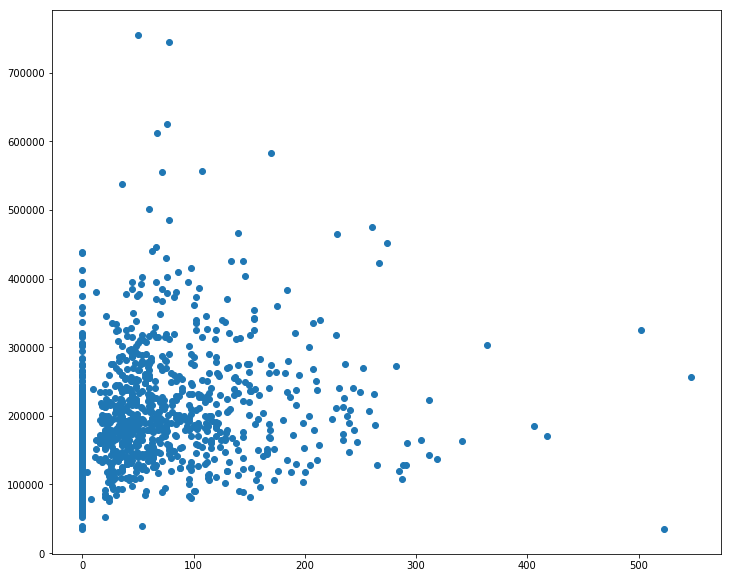

In [117]:
plt.scatter(df['EnclosedPorch'], df['SalePrice'])
plt.show()